# Task 2: Predicting Future Stock Prices (Short-Term)

**Objective:**
Use historical stock data to predict the next day's closing price using regression models.

**Stock Chosen:** Apple Inc. (AAPL) 

**Data Source:** Yahoo Finance (via `yfinance` library)


# Step 1: Import Required Libraries

We import key libraries for data handling, modeling, and plotting:
- `yfinance` for stock data retrieval
- `pandas` and `numpy` for data manipulation
- `sklearn` for regression and metrics
- `matplotlib` and `seaborn` for visualization


In [52]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Step 2: Download Historical Stock Data

We use the `yfinance` API to download historical data for Apple (AAPL) from January 2020 to December 2024.  
This data includes columns like Open, High, Low, Close, Volume, etc.


In [53]:
# Download Apple stock data for the last 5 years
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
data.head()

C:\Users\CS\AppData\Local\Temp\ipykernel_10456\2688513025.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914833,72.676462,71.689973,71.847133,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


# Step 3: Feature and Target Preparation

Our goal is to predict the **next day's closing price**.

- Features used: `Open`, `High`, `Low`, and `Volume`
- Target variable: `Close` value of the **next day**, created by shifting the `Close` column by -1


In [54]:
# Shift Close column to create the "next day's close" as the target
data['Target'] = data['Close'].shift(-1)

# Drop last row (where target is NaN)
data = data[:-1]

# Select features and target
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Target']


# Step 4: Splitting the Data

We split the dataset into training and testing sets without shuffling to preserve the time series structure.  
80% of the data is used for training, and 20% for testing.


In [55]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)


## Step 5: Train the Linear Regression Model

We use the **Linear Regression** model from scikit-learn, a simple and interpretable algorithm that fits a straight line to the data.  
Although it does not capture non-linear patterns, it provides a useful baseline to compare with more complex models like Random Forest.


In [56]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Step 6: Make Predictions

We use the trained model to predict the `Close` price for the test dataset.  
These predictions will be compared to the actual `Close` values.


In [57]:
y_pred = model.predict(X_test)


## Step 7: Evaluate the Model

We evaluate the prediction accuracy using:

- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**

Lower values of these metrics indicate better prediction accuracy.


In [58]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 9.672139459752936
Mean Absolute Error: 2.3399467920793025


## Step 8: Plot Actual vs Predicted Closing Prices

We plot the predicted closing prices against the actual values to visualize how closely the model's predictions align with real data.


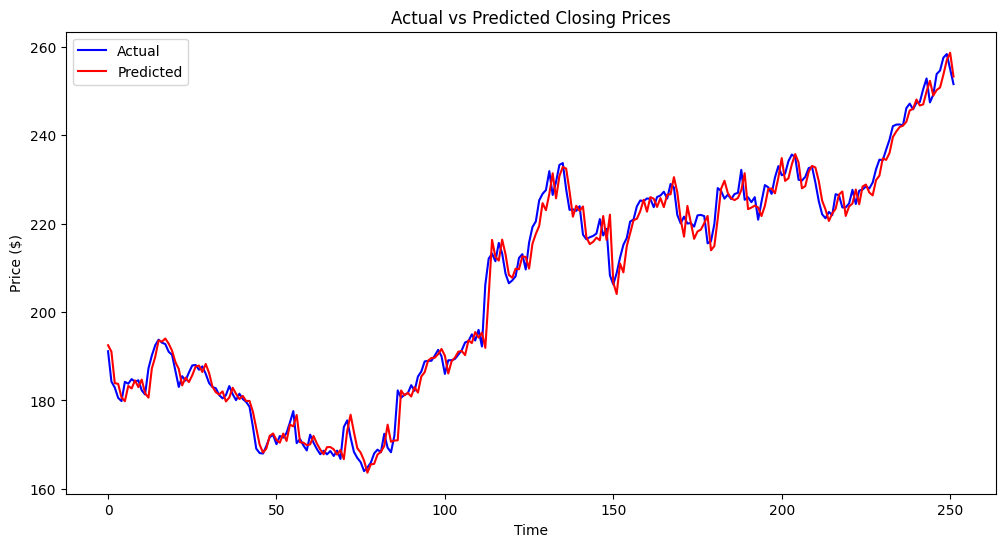

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='red')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


## Final Observations

- The Linear Regression model performed well in predicting the next day's closing price of Apple (AAPL).
- The predicted closing prices closely followed the actual values, indicating the model was able to learn important trends from the data.
- The line plot shows that the model is successfully tracking both upward and downward movements of the stock.
- This suggests that the selected features (`Open`, `High`, `Low`, and `Volume`) contain meaningful patterns for short-term prediction.
- While Linear Regression is a simple model, it provides a strong baseline and performs surprisingly well in this case.
